In [57]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [58]:
#import the data
HRC = yf.Ticker("HRC=F")

In [59]:
data = yf.download("HRC=F", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [60]:
data.head()

Date
2017-01-03    633.0
2017-01-04    628.0
2017-01-05    625.0
2017-01-06    625.0
2017-01-09    625.0
Name: Adj Close, dtype: float64

In [61]:
data.tail()

Date
2022-08-03    819.0
2022-08-04    813.0
2022-08-05    818.0
2022-08-08    818.0
2022-08-09    827.0
Name: Adj Close, dtype: float64

In [62]:
log_returns = np.log(1 + data.pct_change())

In [63]:
log_returns.tail()

Date
2022-08-03   -0.004872
2022-08-04   -0.007353
2022-08-05    0.006131
2022-08-08    0.000000
2022-08-09    0.010942
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

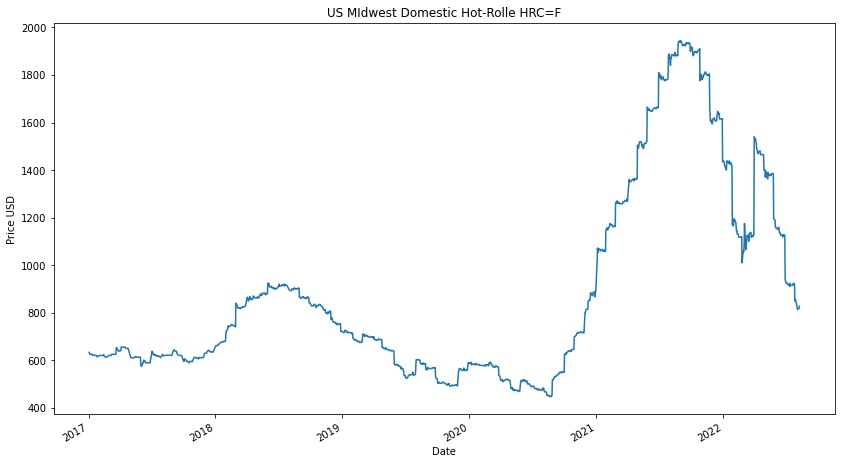

In [64]:
data.plot(figsize=(14,8))
plt.title('US MIdwest Domestic Hot-Rolle HRC=F')
plt.ylabel('Price USD')

In [65]:
u = log_returns.mean()
u

0.00019671396091207823

In [66]:
var = log_returns.var()
var

0.00039473457985943206

In [67]:
stdev = log_returns.std()
stdev

0.019867928423955832

In [68]:
drift = u - (0.5 * var)
drift

-6.533290176377962e-07

In [69]:
np.array(drift)

array(-6.53329018e-07)

In [70]:
np.array(stdev)

array(0.01986793)

In [71]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [72]:
x = np.random.rand(10,2)
x

array([[0.97080717, 0.35917706],
       [0.67295872, 0.88181004],
       [0.00713011, 0.21979545],
       [0.83736874, 0.24937501],
       [0.10703604, 0.06460262],
       [0.22462782, 0.21119826],
       [0.75538832, 0.37276295],
       [0.99695413, 0.53553721],
       [0.57454928, 0.15049807],
       [0.59984736, 0.52729902]])

In [73]:
norm.ppf(x)

array([[ 1.8927911 , -0.36065934],
       [ 0.44809786,  1.18408371],
       [-2.45064097, -0.77288423],
       [ 0.98370105, -0.67645783],
       [-1.24244591, -1.51724341],
       [-0.75665656, -0.80227048],
       [ 0.6915446 , -0.32454442],
       [ 2.74280215,  0.08919671],
       [ 0.18796837, -1.03429957],
       [ 0.25295202,  0.06848199]])

In [74]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.10581662, -1.13046661],
       [ 0.02250421,  0.32207889],
       [ 0.12112993, -0.87914905],
       [ 1.18387968, -0.07278162],
       [ 1.30167855,  0.30612663],
       [ 0.89543673, -0.39223817],
       [-0.42557201,  0.94180083],
       [ 2.30053305, -1.85237502],
       [ 0.49997562,  0.65632762],
       [ 0.16692063, -0.83710163]])

In [75]:
t_intervals = 120
interations = 500

In [76]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.00938314, 1.0234002 , 1.02581049, ..., 0.96298713, 0.99733353,
        1.00401472],
       [1.02222688, 0.99374773, 0.98909415, ..., 0.98523854, 0.97259458,
        1.03978694],
       [0.99091706, 1.01168615, 0.98249887, ..., 0.99117694, 1.02592621,
        1.01494375],
       ...,
       [0.99004351, 0.99670144, 1.00907867, ..., 1.01710363, 1.00260557,
        1.01466879],
       [0.99239912, 0.98182267, 1.02676385, ..., 0.95542074, 0.99921653,
        1.00711017],
       [0.96534211, 0.99122212, 1.02723217, ..., 0.97810074, 1.00968736,
        1.0026896 ]])

In [77]:
s_zero = data.iloc[-1]
s_zero

827.0

In [78]:
price_list = np.zeros_like(daily_returns)

In [79]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
price_list[0] = s_zero
price_list

array([[827., 827., 827., ..., 827., 827., 827.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [81]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [82]:
price_list

array([[ 827.        ,  827.        ,  827.        , ...,  827.        ,
         827.        ,  827.        ],
       [ 845.38163219,  821.8293705 ,  817.98086226, ...,  814.79227128,
         804.33571949,  859.90380194],
       [ 837.70308084,  831.43338895,  803.66527012, ...,  807.60331208,
         825.18909537,  872.75398937],
       ...,
       [1182.81766945,  618.04924157,  718.25595438, ..., 1161.47105889,
         600.79336196,  900.43977911],
       [1173.82721963,  606.81475827,  737.47924844, ..., 1109.69353317,
         600.32266063,  906.84205872],
       [1133.14484273,  601.48821139,  757.56240874, ..., 1085.39206361,
         606.1382017 ,  909.2810991 ]])

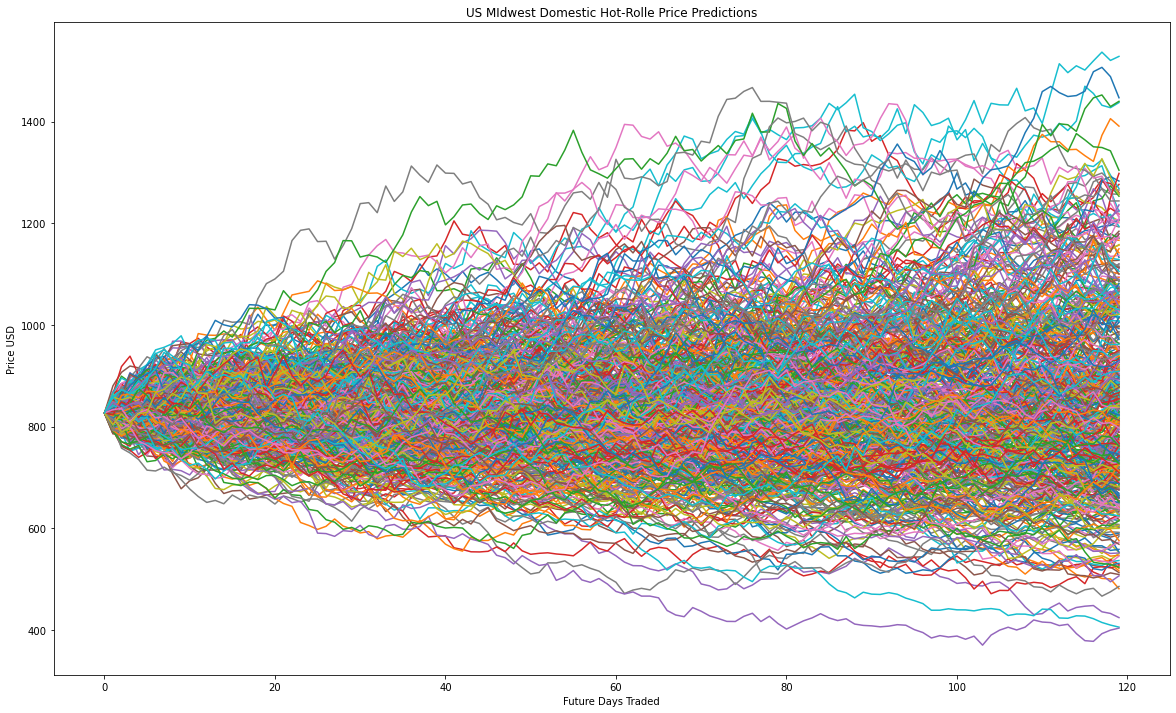

In [83]:
plt.figure(figsize=(20,12))
plt.title('US MIdwest Domestic Hot-Rolle Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)